- 2 Videos have complete transcription using Deep Speech (DS) model and Liv ai (LA) model
- Ouput is a dataframe consisting of 3 columns, Reference text, DS hypothesis, LA hypothesis
- Pickle file names are: Vsg_PFQmw4I.b and Kgowgm1KeZ4.b

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import text # WER calulation module from DS repo, it uses Lavenstien distance
import wer

%matplotlib inline

In [2]:
with open("Vsg_PFQmw4I.b", "rb") as f1, \
        open("Kgowgm1KeZ4.b", "rb") as f2:
    vdf1 = pickle.load(f1)
    vdf2 = pickle.load(f2)

In [3]:
# Find the shape
print("vdf1: Number of audio segments:{}".format(vdf1.shape[0]))
print("vdf2: Number of audio segments:{}".format(vdf2.shape[0]))


vdf1: Number of audio segments:1574
vdf2: Number of audio segments:1457


In [28]:
# For video 1
wer_v1 = []
for val in vdf1.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v1.append([1.0, 1.0])
        continue
    wer_v1.append([text.wer(ref, ds_hyp), text.wer(ref, la_hyp)])

In [29]:
# For video 2
wer_v2 = []
for val in vdf2.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v2.append([1.0, 1.0])
        continue
    wer_v2.append([text.wer(ref, ds_hyp), text.wer(ref, la_hyp)])

In [30]:
# Push the wer to data frame for easier calculations
werds_df1 = pd.DataFrame(wer_v1, columns=["WER for DS", "WER for LA"])
werds_df2 = pd.DataFrame(wer_v2, columns=["WER for DS", "WER for LA"])

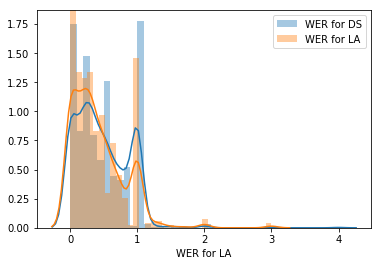

In [31]:
# Plotting the graph for v1
sns.distplot(werds_df1["WER for DS"], label="WER for DS")
sns.distplot(werds_df1["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

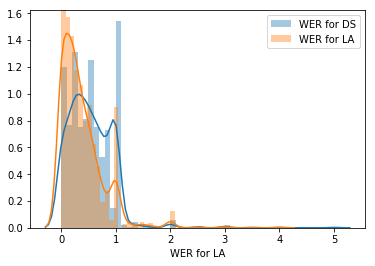

In [8]:
# Plotting the graph for v1
sns.distplot(wer_df2["WER for DS"], label="WER for DS")
sns.distplot(wer_df2["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

### Lower WER is better

In [32]:
# Look at these stats
werds_df1.describe()

,WER for DS,WER for LA
count,1574.000000,1574.000000
mean,0.472616,0.419199
std,0.380904,0.395483
min,0.000000,0.000000
25%,0.166667,0.125000
50%,0.400000,0.333333
75%,0.750000,0.625000
max,4.000000,3.000000


In [33]:
# Look at these stats
werds_df2.describe()

,WER for DS,WER for LA
count,1457.000000,1457.000000
mean,0.533501,0.367991
std,0.414186,0.388370
min,0.000000,0.000000
25%,0.250000,0.100000
50%,0.500000,0.266667
75%,0.800000,0.500000
max,5.000000,4.000000


### Average of WER

In [34]:
print("WER average for video 1: ", werds_df1.mean(), sep="\n")
print("WER average for video 2: ", werds_df2.mean(), sep="\n")

WER average for video 1: 
WER for DS    0.472616
WER for LA    0.419199
dtype: float64
WER average for video 2: 
WER for DS    0.533501
WER for LA    0.367991
dtype: float64


In [12]:
0.472616 - 0.419199

0.05341699999999999

In [13]:
0.533501 - 0.367991

0.16551

**For video 1, WER for LA is better by 5.34% <br />
  For video 2, WER for LA is better by 16.55%**

## Calculating WER using wer module

In [14]:
# For video 1
wer_v1 = []
for val in vdf1.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v1.append([1.0, 1.0])
        continue
    wer_v1.append([wer.wer(ref, ds_hyp), wer.wer(ref, la_hyp)])

wer.py:25: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if r[i-1] == h[j-1]:


In [15]:
# For video 2
wer_v2 = []
for val in vdf2.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v2.append([1.0, 1.0])
        continue
    wer_v2.append([wer.wer(ref, ds_hyp), wer.wer(ref, la_hyp)])

In [16]:
# Push the wer to data frame for easier calculations
wer_df1 = pd.DataFrame(wer_v1, columns=["WER for DS", "WER for LA"])
wer_df2 = pd.DataFrame(wer_v2, columns=["WER for DS", "WER for LA"])

### Lower WER is better

**Note the WER is in percentage here**

In [17]:
wer_df1.describe()

,WER for DS,WER for LA
count,1574.000000,1574.000000
mean,31.026844,29.045137
std,29.317673,33.285246
min,0.000000,0.000000
25%,9.090909,5.595238
50%,23.076923,19.148936
75%,43.463959,40.000000
max,300.000000,350.000000


In [18]:
wer_df2.describe()

,WER for DS,WER for LA
count,1457.000000,1457.000000
mean,33.260207,25.250220
std,31.752931,33.140923
min,0.000000,0.000000
25%,13.043478,4.444444
50%,26.086957,15.555556
75%,46.296296,34.090909
max,450.000000,450.000000


In [19]:
31.026844 - 29.045137

1.981707

In [20]:
33.260207 - 25.250220

8.009987000000002

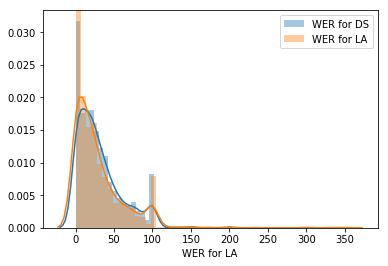

In [21]:
# Plotting the graph for v1
sns.distplot(wer_df1["WER for DS"], label="WER for DS")
sns.distplot(wer_df1["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

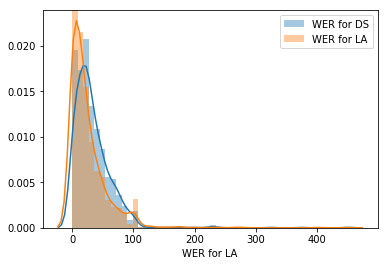

In [22]:
sns.distplot(wer_df2["WER for DS"], label="WER for DS")
sns.distplot(wer_df2["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

### According to wer module
**For video 1, WER for LA is better by 1.98% <br />
  For video 2, WER for LA is better by 8%**

## Combining the entire output of DS/LA model to single file

In [23]:
# with open("reference_v1.txt", "w") as f:
#     for val in vdf1.iterrows():
#         f.write(val[1]["Reference"] + " ")
        
# with open("reference_v2.txt", "w") as f:
#     for val in vdf2.iterrows():
#         f.write(val[1]["Reference"] + " ")

In [24]:
# with open("ds_hyp_v1.txt", "w") as f1, open("la_hyp_v1.txt", "w") as f2:
#     for val in vdf1.iterrows():
#         f1.write(val[1]["Deepspeech hypothesis"] + " ")
#         f2.write(val[1]["Livai hypothesis"] + " ")
        
# with open("ds_hyp_v2.txt", "w") as f1, open("la_hyp_v2.txt", "w") as f2:
#     for val in vdf2.iterrows():
#         f1.write(val[1]["Deepspeech hypothesis"] + " ")
#         f2.write(val[1]["Livai hypothesis"] + " ")

### wer.py is not able to calculate for huge text files

In [25]:

# print("Video 1, DS WER: ", wer.wer("reference_v1.txt", "ds_hyp_v1.txt"))
# print("Video 1, LA WER: ", wer.wer("reference_v1.txt", "la_hyp_v1.txt"))

In [26]:
# print("Video 2, DS WER: ", wer.wer("reference_v2.txt", "ds_hyp_v2.txt"))
# print("Video 2, LA WER: ", wer.wer("reference_v2.txt", "la_hyp_v2.txt"))

Cannot run WER on entire files, as they are very huge, RAM runs out of memory

# Calculating the WER using python wer module

In [27]:
# %%sh
# wer reference_v1.txt ds_hyp_v1.txt

Cannot run WER on entire files, as they are very huge, RAM runs out of memory

# Insights

### Using Deepspeech repo's WER module
For video 1, WER for LA is better by **5.34%** than DS
For video 2, WER for LA is better by **16.55%** than DS

WER average for video 1: <br />
WER for DS  =  47.2616<br />
WER for LA  =  41.9199

WER average for video 2: <br />
WER for DS  =  53.3501<br />
WER for LA  =  36.7991

### Using wer.py from a github repo
For video 1, WER for LA is better by **1.98%** than DS
For video 2, WER for LA is better by **8%** than DS

WER average for video 1: <br />
WER for DS  =  31.026844<br />
WER for LA  =  29.045137

WER average for video 2: <br />
WER for DS  =  33.260207<br />
WER for LA  =  25.250220



# Treat the outliers here

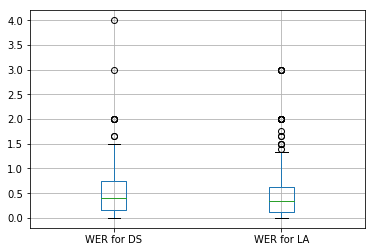

In [35]:
werds_df1.boxplot()

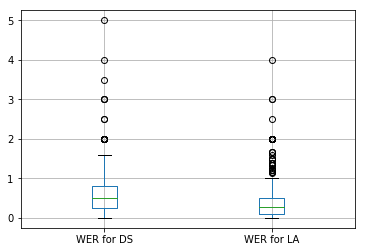

In [40]:
werds_df2.boxplot()

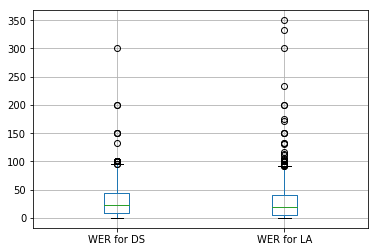

In [43]:
wer_df1.boxplot()
plt.show()

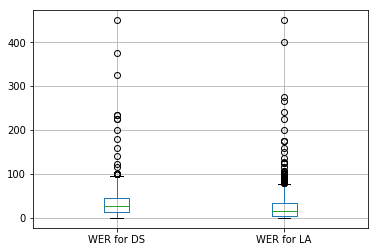

In [44]:
wer_df2.boxplot()

There are plenty of values that have WER above 1 or 100%.
WER 0 means no error at all and 1 means its total error

In [45]:
vdf1


,Reference,Deepspeech hypothesis,Livai hypothesis
0,the most beautiful thing about time is,most beautiful thing about time is,most beautiful thing about time is
1,if you do something it passes by,i should do something it passes by,if you do something it passes by
2,if you do nothing it passes by,they should do nothing it passes by,if you do nothing yet passage by
3,if you are joyful it passes by,i so joyful it passes by,if you join for it places by
4,if you are miserable it passes by,i so miserable it passes why,is major ko ek prices by
5,its absolutely just no matter who you are,its absolutely get no matter who you are,its absolutely just no matter who you are
6,how you are,o you,kahan ho
7,for everyboy it passes at the same speed,everybody it passes of the same speed,everybody it passes the same speed
8,only thing is our experience of the time could...,one thing is our experience of the time could ...,only thing is our experience of the time could...
9,depending upon how intensely we live,depenicuponor how intensely relive,defening upon how intensively
